In [7]:
import cv2
import os
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [8]:
img_dir = "C:\\Users\\sudhir\\Desktop\\LANE DETECTION\\test_image"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    data.append(img)

In [9]:
def display_images(images, cmap=None):
    plt.figure(figsize=(40,40))
    for i, image in enumerate(images):
        plt.subplot(3,2,i+1)
        plt.imshow(image, cmap)
        plt.autoscale(tight=True)
    plt.show()

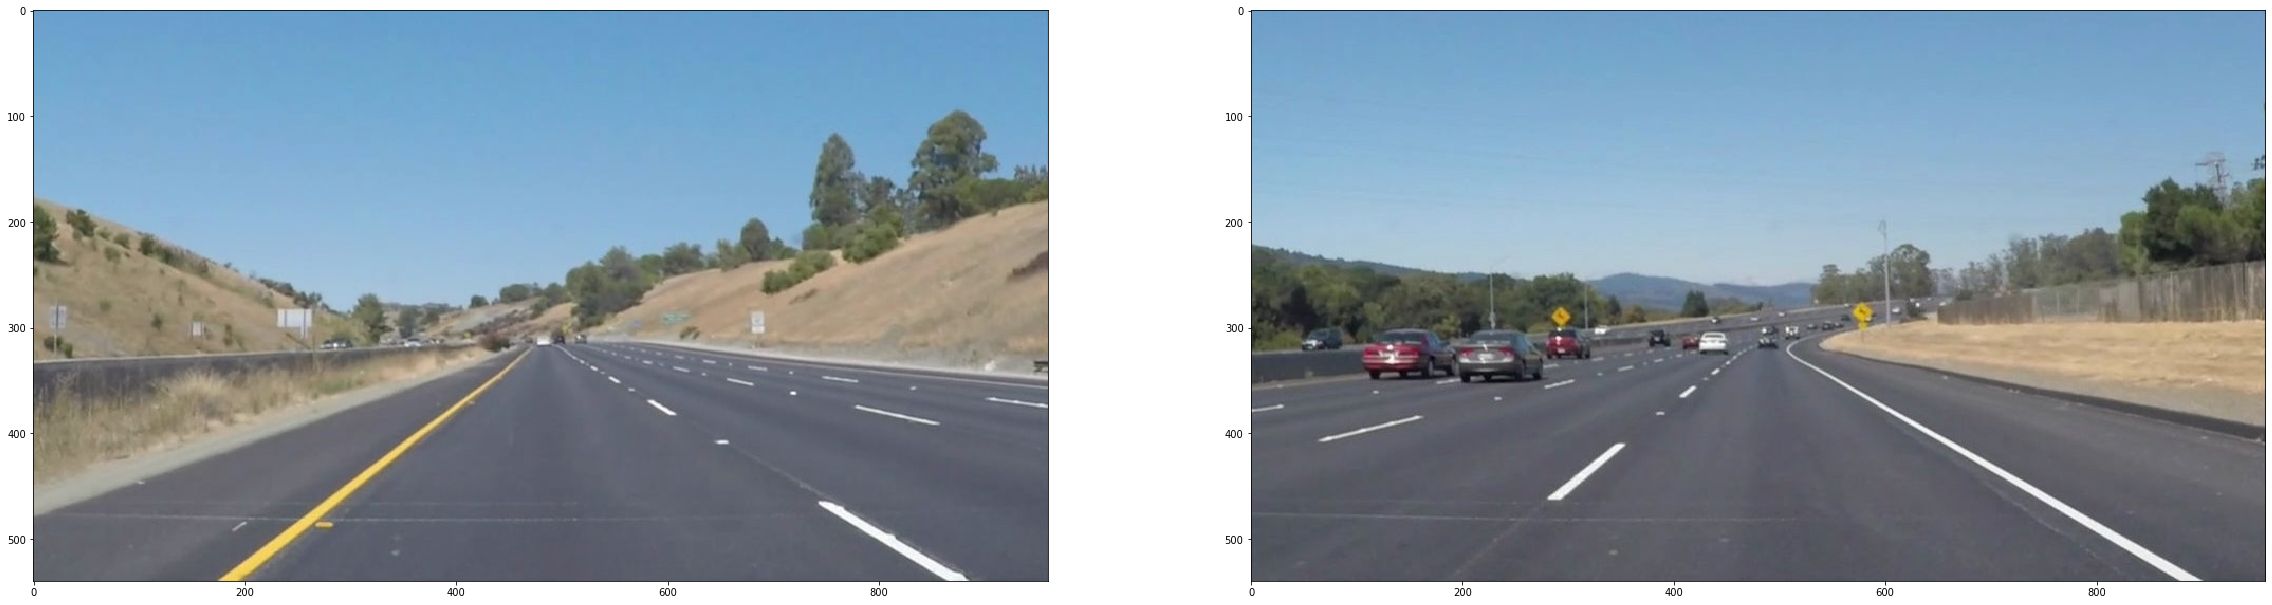

In [10]:
display_images(data)

In [11]:
import numpy as np

In [12]:
def color_filter(image):
    #convert to HLS to mask based on HLS
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    lower = np.array([0,190,0])
    upper = np.array([255,255,255])
    yellower = np.array([10,0,90])
    yelupper = np.array([50,255,255])
    yellowmask = cv2.inRange(hls, yellower, yelupper)
    whitemask = cv2.inRange(hls, lower, upper)
    mask = cv2.bitwise_or(yellowmask, whitemask)  #bitwise_or
    masked = cv2.bitwise_and(image, image, mask = mask) #bitwise_and
    return masked

In [13]:
filtered_img = list(map(color_filter, data))

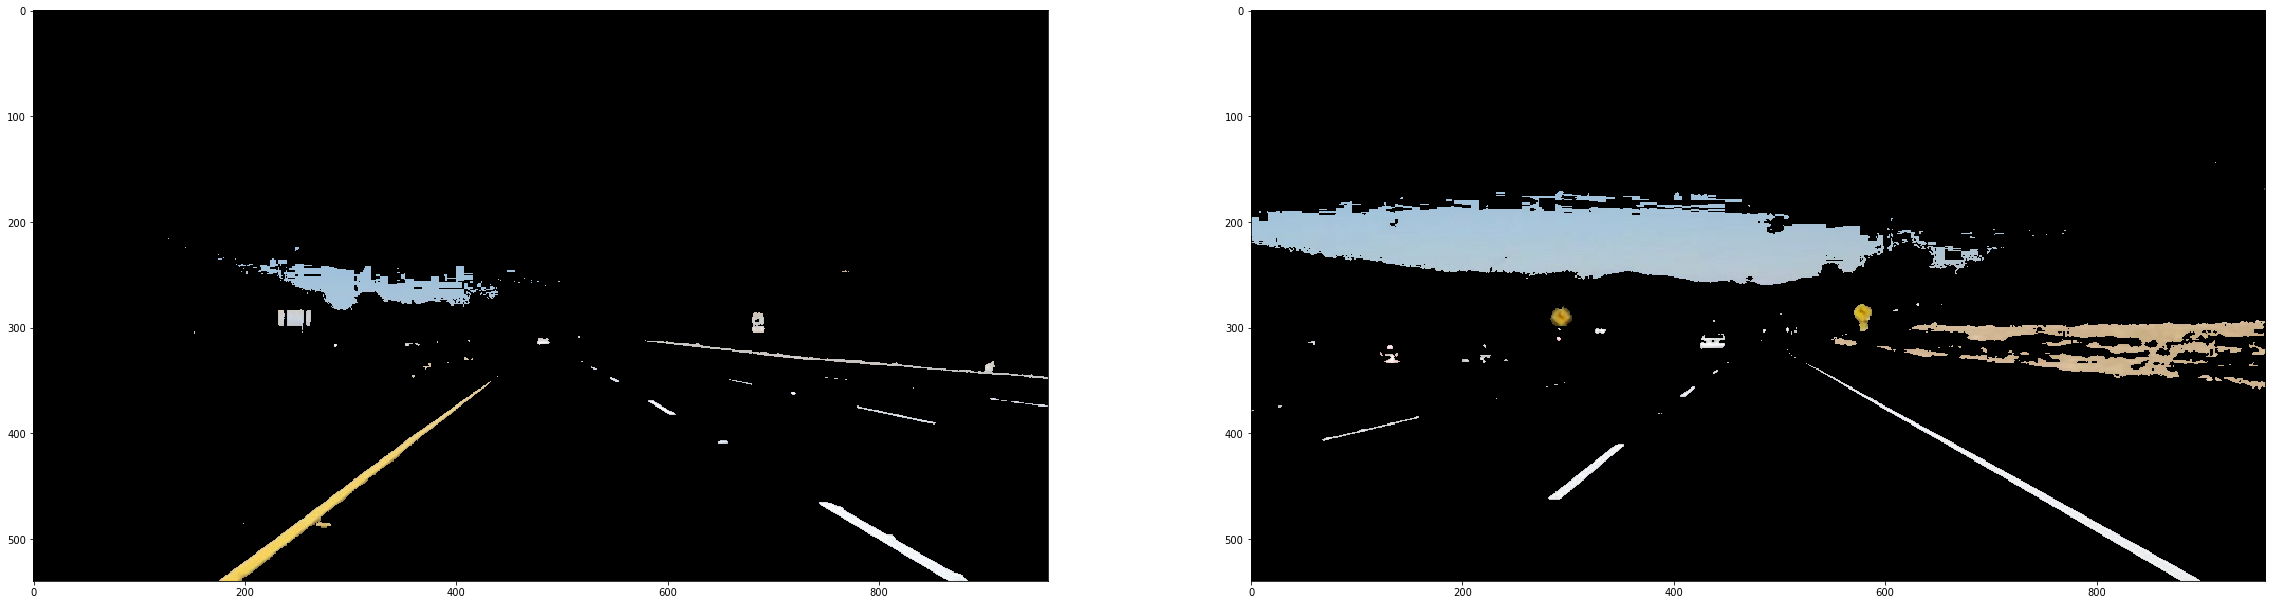

In [14]:
display_images(filtered_img)

In [15]:
def roi(img):
    x = int(img.shape[1])
    y = int(img.shape[0])
    shape = np.array([[int(0), int(y)], [int(x), int(y)], [int(0.55*x), int(0.6*y)], [int(0.45*x), int(0.6*y)]])
    #define a numpy array with the dimensions of img, but comprised of zeros
    mask = np.zeros_like(img)
    #Uses 3 channels or 1 channel for 6color depending on input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    #creates a polygon with the mask color
    cv2.fillPoly(mask, np.int32([shape]), ignore_mask_color)
    #returns the image only where the mask pixels are not zero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [16]:
roi_img = list(map(roi, filtered_img))

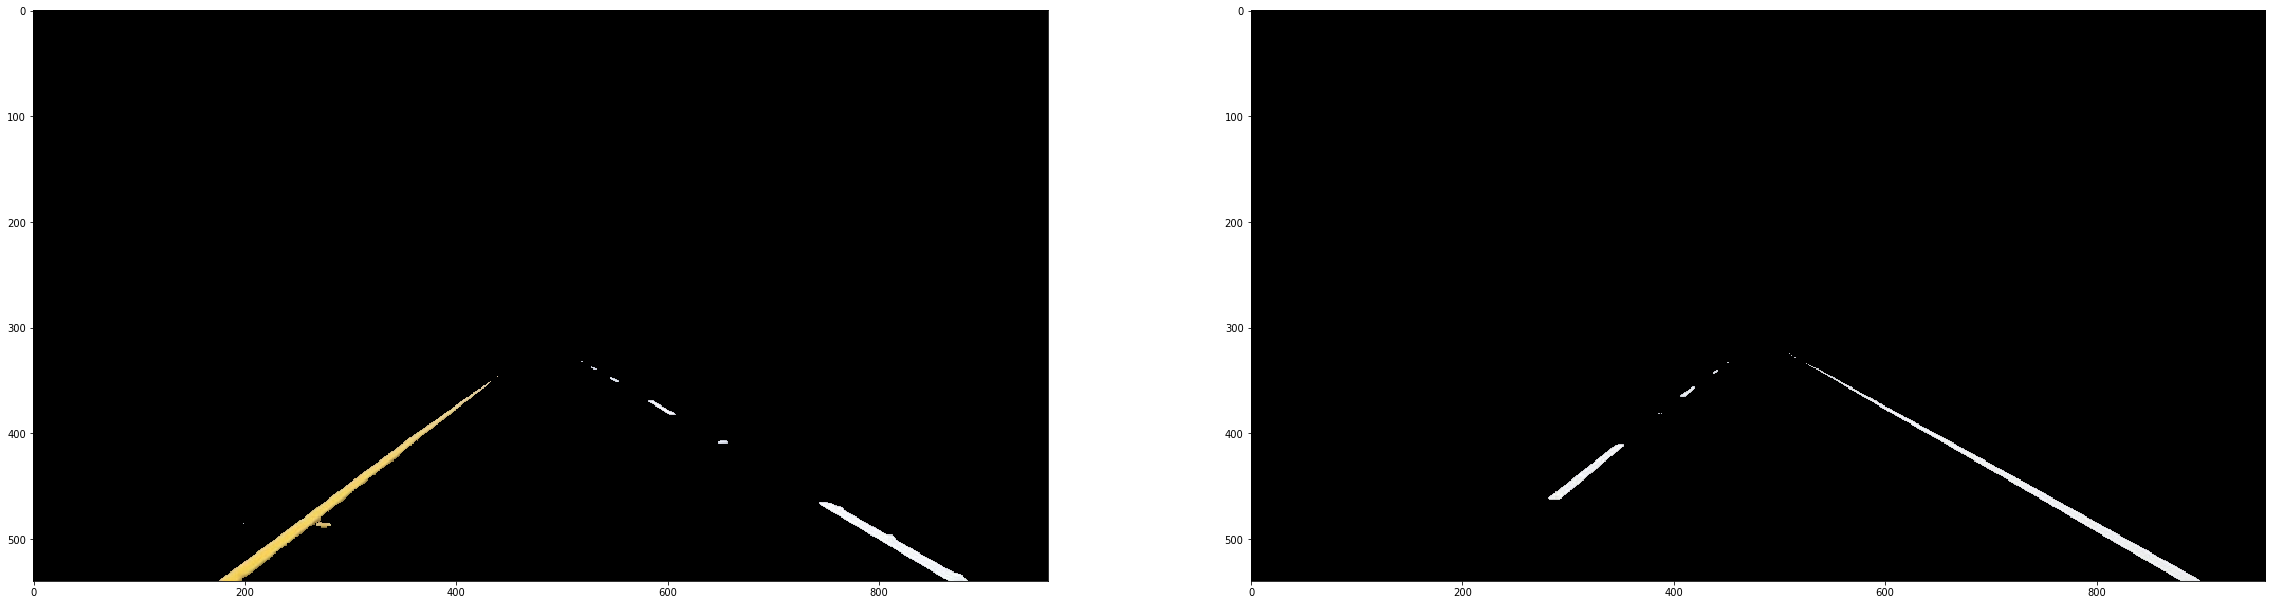

In [17]:
display_images(roi_img)

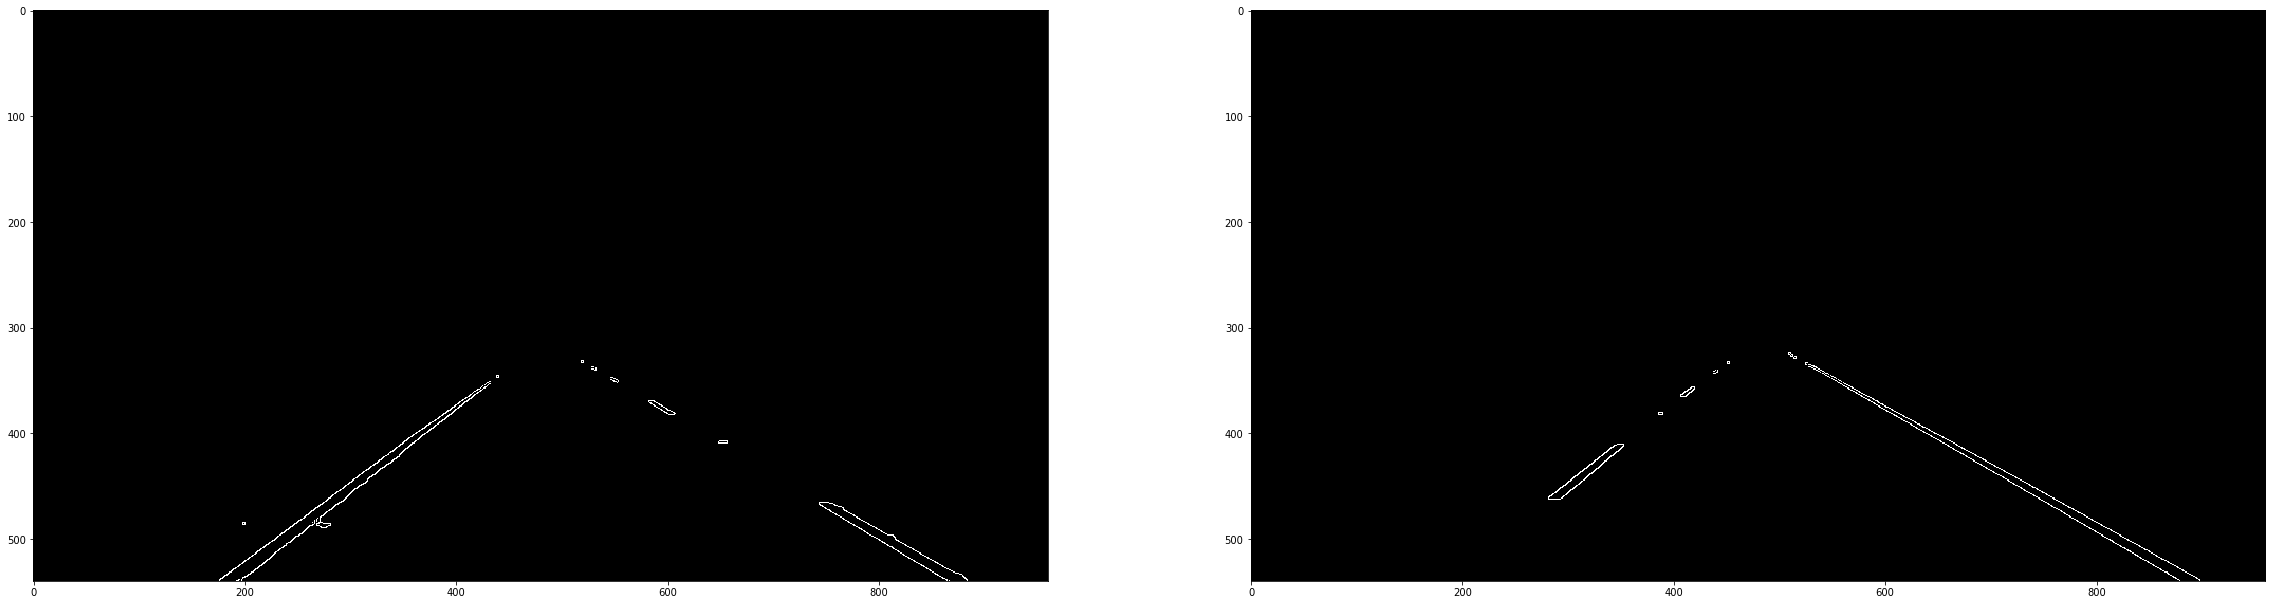

In [18]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
def canny(img):
    return cv2.Canny(grayscale(img), 50, 120)
canny_img = list(map(canny, roi_img))
display_images(canny_img,cmap='gray')